<a href="https://colab.research.google.com/github/bebelana/diferencaGeneroTecnologia/blob/main/diferencaGeneroTI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*A diferença de genero na tecnologia: analisando dados *


In [65]:
#importando bibliotecas
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly as py


In [66]:
#lendo o arquivo csv
df = pd.read_csv('/content/multiple_choice_responses.csv')

<ipython-input-66-5e33337ab68f>:2: DtypeWarning:

Columns (0,3,7,19,34,47,49,50,51,52,53,54,68,81,94,96,109,115,130,139,147,154,167,180,193,206,219,232,245) have mixed types. Specify dtype option on import or set low_memory=False.



In [67]:
#escolhendo as colunas que precisamos
df = df[['Q1','Q2','Q3','Q4','Q5','Q10']]
df.columns = ['idade','gênero','país','escolaridade','cargo','salário']
df = df.drop(df.index[0])
df.head()

,idade,gênero,país,escolaridade,cargo,salário
1,22-24,Male,France,Master’s degree,Software Engineer,"30,000-39,999"
2,40-44,Male,India,Professional degree,Software Engineer,"5,000-7,499"
3,55-59,Female,Germany,Professional degree,NaN,NaN
4,40-44,Male,Australia,Master’s degree,Other,"250,000-299,999"
5,22-24,Male,India,Bachelor’s degree,Other,"4,000-4,999"


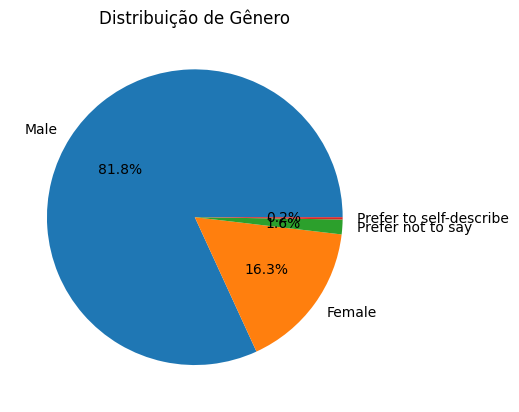

In [68]:
# Contagem de valores de gênero
contagem_genero = df['gênero'].value_counts()

# Plotar gráfico de pizza
plt.pie(contagem_genero.values, labels=contagem_genero.index, autopct='%1.1f%%')

# Configurar o título do gráfico
plt.title('Distribuição de Gênero')

# Exibir o gráfico
plt.show()

In [69]:
#Distribuição etária de todos os entrevistados com sexo
idade_genero = df.loc[:,["idade", "gênero"]].groupby(["idade", "gênero"]).size().reset_index()
idade_genero.columns = ["Idade", "Gênero", "Contagem"]
fig = px.bar(idade_genero, x='Idade', y='Contagem', color="Gênero", 
             barmode='group', title ="Distribuição de Idade por Gênero", 
             height=500, width=800)
fig.update_traces(marker_line_color='rgb(9,50,100)',
                  marker_line_width=1.5, opacity=0.6)
fig.show()

In [70]:
# Distribuição de escolaridade
contagem_escolaridade = pd.DataFrame({'escolaridade': df["escolaridade"].value_counts().index, 'contagem': df["escolaridade"].value_counts().values}).sort_values("contagem")

# Criar gráfico de barras com Plotly Express
fig = px.bar(contagem_escolaridade, x='escolaridade', y='contagem')
fig.update_traces(marker_color="indianred", marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Nível de escolaridade')

# Exibir o gráfico
fig.show()

In [71]:
# Distribuiçaõ de escolaridade e gênero 

escolaridade_genero = df.loc[:,["escolaridade", "gênero"]].groupby(["escolaridade", "gênero"]).size().reset_index()
escolaridade_genero.columns = ["Escolaridade", "Gênero", "Contagem"]
fig = px.bar(escolaridade_genero, x='Escolaridade', y='Contagem', color="Gênero", 
             barmode='group', title ="Distribuição de escolaridade por Gênero", 
             height=500, width=800)
fig.update_traces(marker_line_color='rgb(9,50,100)',
                  marker_line_width=1.5, opacity=0.6)
fig.show()

In [72]:
# Distribuição de cargo
contagem_cargo = pd.DataFrame({'titulo': df["cargo"].value_counts().index, 'valor': df["cargo"].value_counts().values}).sort_values("valor")

# Criar gráfico de barras com Plotly Express
fig = px.bar(contagem_cargo, x='titulo', y='valor')
fig.update_traces(marker_color="indianred", marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Cargos')

# Exibir o gráfico
fig.show()

In [73]:
#Distribuição de cargos por gênero

cargo_por_sexo = df.groupby(['gênero', 'cargo']).size().reset_index(name='quantidade')

# Criar gráfico de barras empilhadas
fig = px.bar(cargo_por_sexo, x='cargo', y='quantidade', color='gênero', barmode='stack')

# Personalizar layout do gráfico
fig.update_layout(title_text='Distribuição de Cargos por Sexo', xaxis_title='Cargo', yaxis_title='Contagem')

# Exibir o gráfico
fig.show()


In [74]:
# Distribuição de sálario
contagem_salario = pd.DataFrame({'Valor': df["salário"].value_counts().index, 'contagem': df["salário"].value_counts().values}).sort_values("contagem")

# Criar gráfico de barras com Plotly Express
fig = px.bar(contagem_salario, x='Valor', y='contagem')
fig.update_traces(marker_color="indianred", marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Sálario')

# Exibir o gráfico
fig.show()

In [75]:
#Distribuição salarial por gênero
sal = df.loc[:,["salário", "gênero"]].groupby(["salário", "gênero"]).size().reset_index()
sal.columns = ["Sálario", "Gênero", "Contagem"]
fig = px.bar(sal, x='Sálario', y='Contagem', color="Gênero", 
             barmode='group', title ="Distribuição de salario e gênero", 
             height=400, width=2000)
fig.update_traces(marker_line_color='rgb(9,50,100)',
                  marker_line_width=1.5, opacity=0.6)
fig.show()

In [76]:
pais_por_genero = df.groupby(['gênero', 'país']).size().reset_index(name='counts')

# Criar gráfico de barras agrupadas
fig = px.bar(pais_por_genero, x='país', y='counts', color='gênero', barmode='group')

# Personalizar layout do gráfico
fig.update_layout(title_text='Distribuição de Países por Gênero', xaxis_title='País', yaxis_title='Contagem')

# Exibir o gráfico
fig.show()